# PSF CDP cube image to detector plane projection
In this notebook we illustrate the equivalence between the PSF CDP values in cube space and the 2D projected PSF values.

In [1]:
# load modules
import funcs
import mrsobs
from distortionMaps import d2cMapping

import os
import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define the paths to the data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'

In [3]:
# Pick spectral band (side of the slope image) to be analyzed
band = '1A'

In [4]:
# load the MRS distortion maps, they are used extensively in a multitude of python functions relating to the analysis of MRS data
d2cMaps = d2cMapping(band,cdpDir+'CDP8/',fileversion = "8B.05.01") # here, d2c stands for detector to cube transformation, from x,y integer pixel coordinates, to alpha, beta (or RA and DEC), and wavelength coordinates

In [5]:
print('DISTORTION CDP filename: {}'.format(d2cMaps['cdp_filename']))

DISTORTION CDP filename: MIRI_FM_MIRIFUSHORT_12SHORT_DISTORTION_8B.05.01.fits


In [6]:
psf_fits_file = cdpDir+"MIRI_FM_MIRIFUSHORT_1SHORT_PSF_07.02.00.fits"
psffits = fits.open(psf_fits_file)
psf_cube_shape = psffits[1].data.shape

In [7]:
print('PSF CDP filename: {}'.format(os.path.basename(funcs.get_cdps(band,cdpDir,output='filepath')[2])))
print('Size of CDP PSF array: {}'.format(psf_cube_shape))

PSF CDP filename: MIRI_FM_MIRIFUSHORT_1SHORT_PSF_07.02.00.fits
Size of CDP PSF array: (218, 243, 243)


In [8]:
# PSF CDP is provided as a spectral cube
#>get values
psf_values = psffits[1].data.transpose(2,1,0).copy() # flip data from Z,Y,X to X,Y,Z

#>get grid
NAXIS1,NAXIS2,NAXIS3 = psf_values.shape

alphastpix = psffits[1].header['CRPIX1'] # pixel nr
alpha_step = psffits[1].header['CDELT1'] # arcsec/pix
stalpha    = psffits[1].header['CRVAL1']-(alphastpix-1)*alpha_step # arcsec

betastpix = psffits[1].header['CRPIX2'] # pixel nr
beta_step = psffits[1].header['CDELT2'] # arcsec/pix
stbeta    = psffits[1].header['CRVAL2']-(betastpix-1)*beta_step # arcsec

stwavl = psffits[1].header['CRVAL3'] # microns
wavl_step   = psffits[1].header['CDELT3'] # microns/pix

alpha_slices = np.linspace(stalpha,stalpha+ (NAXIS1-1.5)*alpha_step,NAXIS1)
beta_slices  = np.linspace(stbeta,stbeta+ (NAXIS2-1.5)*beta_step,NAXIS2)
wvl_slices   = np.linspace(stwavl ,stwavl+NAXIS3*wavl_step,NAXIS3)

<IPython.core.display.Javascript object>


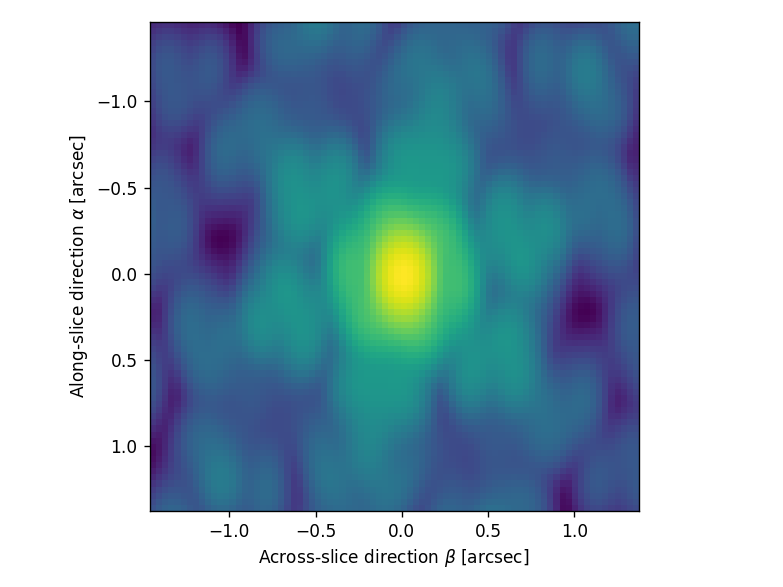

In [10]:
plt.figure()
plt.imshow(np.log10(psf_values[80:160,80:160,100]),extent=(beta_slices[80],beta_slices[160],alpha_slices[160],alpha_slices[80]))
plt.xlabel(r'Across-slice direction $\beta$ [arcsec]')
plt.ylabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.tight_layout()